# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [15]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.48064481 2.04459166 2.09342265 2.28270986 2.67144279 2.77532186
 2.39834917 2.13473106 2.96079618 2.63510608]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
# your code here

def uniform_random_numbers(bottom,ceiling,count):                 ## create our function
    return np.random.uniform(bottom,ceiling,count)

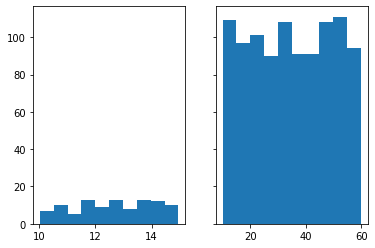

In [7]:
fig, (pl1, pl2) = plt.subplots(nrows=1,ncols=2,sharey=True)         ## create 2 subplots with share of y axis
pl1.hist(uniform_random_numbers(10,15,100),bins=10)                 ## hist with 10 bins
pl2.hist(uniform_random_numbers(10,60,1000),bins=10)                ## hist with 10 bins

plt.show()                                                          ## show the results

How are the two distributions different?

In [ ]:
# your answer here:
## because the maximum value and number of results are different

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [8]:
# your code here

def normal_random_numbers(avg,stdev,size):                 ## create our function
    return np.random.normal(avg,stdev,size)

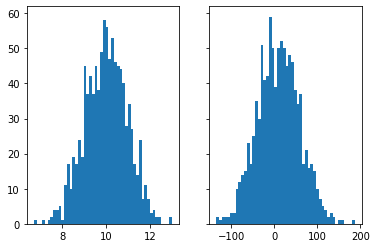

In [11]:
fig, (pl1, pl2) = plt.subplots(nrows=1,ncols=2,sharey=True)         ## create 2 subplots with share of y axis
pl1.hist(normal_random_numbers(10,1,1000),bins=50)                 ## hist with 50 bins
pl2.hist(normal_random_numbers(10,50,1000),bins=50)                ## hist with 50 bins

plt.show()                                                          ## show the results

How are the two distributions different?

In [ ]:
# your answer here:

## standard deviation is different
## data more disperse in the second case


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.

In [13]:
# your code here
vehicles = pd.read_csv('vehicles.csv')  ## import dataset
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Then plot the histograms for the following variables:

1. Fuel Barrels/Year

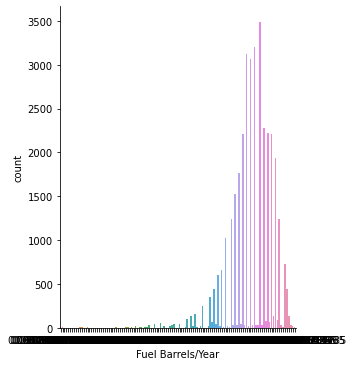

In [16]:
sns.catplot(x="Fuel Barrels/Year", kind="count", data=vehicles)          ## also using a bar graph and count the results in each

2. CO2 Emission Grams/Mile 

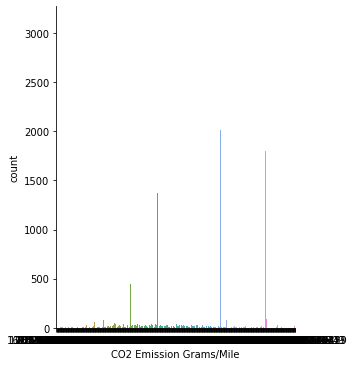

In [17]:
# your code here
sns.catplot(x="CO2 Emission Grams/Mile", kind="count", data=vehicles)          ## also using a bar graph and count the results in each

3. Combined MPG

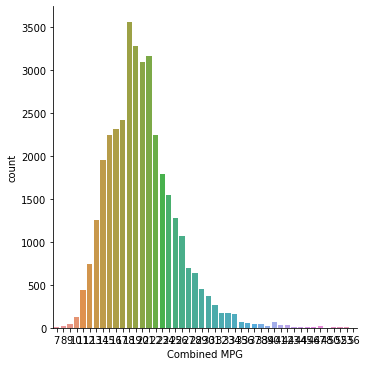

In [18]:
# your code here
sns.catplot(x="Combined MPG", kind="count", data=vehicles)          ## also using a bar graph and count the results in each

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:

## from the observation of the data distribution we can say that "Fuel Barrels/Year" and "CO2 Emission Grams/Mile"
## we need to confirm if the "Combined MPG" is or not.
## there are a few tests that we can perform

In [21]:
## Shapiro-Wilk Test

from scipy.stats import shapiro

# normality test
def shapiro_test(data_test):
	stat, p = shapiro(data_test)
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

shapiro_test(vehicles['Fuel Barrels/Year'])            ## not gaussian
shapiro_test(vehicles['CO2 Emission Grams/Mile'])      ## not gaussian
shapiro_test(vehicles['Combined MPG'])                 ## not gaussian

Statistics=0.967, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.967, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.947, p=0.000
Sample does not look Gaussian (reject H0)


In [22]:
## D’Agostino’s K^2 Test
from scipy.stats import normaltest

# normality test
def agostino_test(data_test):
	stat, p = normaltest(data_test)
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')


agostino_test(vehicles['Fuel Barrels/Year'])            ## not gaussian
agostino_test(vehicles['CO2 Emission Grams/Mile'])      ## not gaussian
agostino_test(vehicles['Combined MPG'])                 ## not gaussian

Statistics=3216.560, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=3608.604, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=6994.460, p=0.000
Sample does not look Gaussian (reject H0)


In [37]:
## Anderson-Darling Test
from scipy.stats import anderson

# normality test
def anderson_test(data_test):
    print("Statistic: %.3f" %(anderson(data_test).statistic))
    p = 0
    for i in range(len(anderson(data_test).critical_values)):
	    sl, cv = anderson(data_test).significance_level[i], anderson(data_test).critical_values[i]
	    if anderson(data_test).statistic < anderson(data_test).critical_values[i]:
		    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	    else:
		    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

anderson_test(vehicles['Fuel Barrels/Year'])            ## not gaussian   ## diferente significance levels and critical values
anderson_test(vehicles['CO2 Emission Grams/Mile'])      ## not gaussian
anderson_test(vehicles['Combined MPG'])                 ## not gaussian

Statistic: 319.973
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 309.421
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
Statistic: 341.201
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [38]:
# your code here
def exponential_random_numbers(avg,size):                 ## create our function
    return np.random.exponential(avg,size)

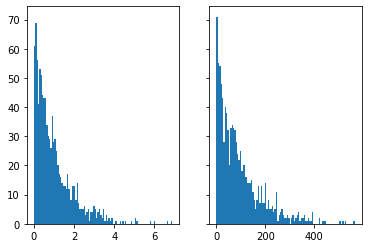

In [39]:
fig, (pl1, pl2) = plt.subplots(nrows=1,ncols=2,sharey=True)            ## create 2 subplots with share of y axis
pl1.hist(exponential_random_numbers(1,1000),bins=100)                  ## hist with 100 bins
pl2.hist(exponential_random_numbers(100,1000),bins=100)                ## hist with 100 bins

plt.show()                                                             ## show the results

How are the two distributions different?

In [ ]:
# your answer here:
## different means

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [41]:
# your answer here
# Hint: This is same as saying P(x<15)

lambda_inv = 10 
exp_distribution = expon(scale=lambda_inv) 

print('probability that the a customer will spend less than 15 minuyes is %.3f' %exp_distribution.cdf(15))  ##round to 3 decimal 

probability that the a customer will spend less than 15 minuyes is 0.777


What is the probability that the customer will spend more than 15 minutes

In [43]:
# your answer here

print('probability that the a customer will spend more than 15 minuyes is %.3f' %(1 - (exp_distribution.cdf(15))))  ##round to 3 decimal 

probability that the a customer will spend more than 15 minuyes is 0.223
